# Segmenting Time-lapse movies

The plugin is designed to work not just with single images but also with **stacks of images**, in particular time-lapses.

Here's an example clip showing how we can segment an entire fluorescence microscopy time-lapse of a cell with a few clicks (see below for more details):

<video width="620" controls 
        src=../images/convpaint_timelapse.webm 
        type=video/webm> 
</video>

## Step by step

Here we explain the process step by step. First, we need to import an image. This can be done in the ways usual for napari (menu, drag and drop etc.).

What is important in order to replicate this use-case is that the image is **three dimensional**, the third dimension being time or z. In napari, it will be accessible via the slider.

In [ ]:
import napari
from napari_convpaint.conv_paint_widget import ConvPaintWidget
from napari.utils import nbscreenshot
import matplotlib.pyplot as plt

In [ ]:
viewer = napari.Viewer()
self = ConvPaintWidget(viewer)
viewer.window.add_dock_widget(self)

In [ ]:
import skimage
im = skimage.io.imread('../../../Projects_data/napari-morphodynamics/exp051_fov000_small.tiff/')
viewer.add_image(im[0,0:10])
viewer.layers[0].contrast_limits = [-10.0, 452.57342657342656]

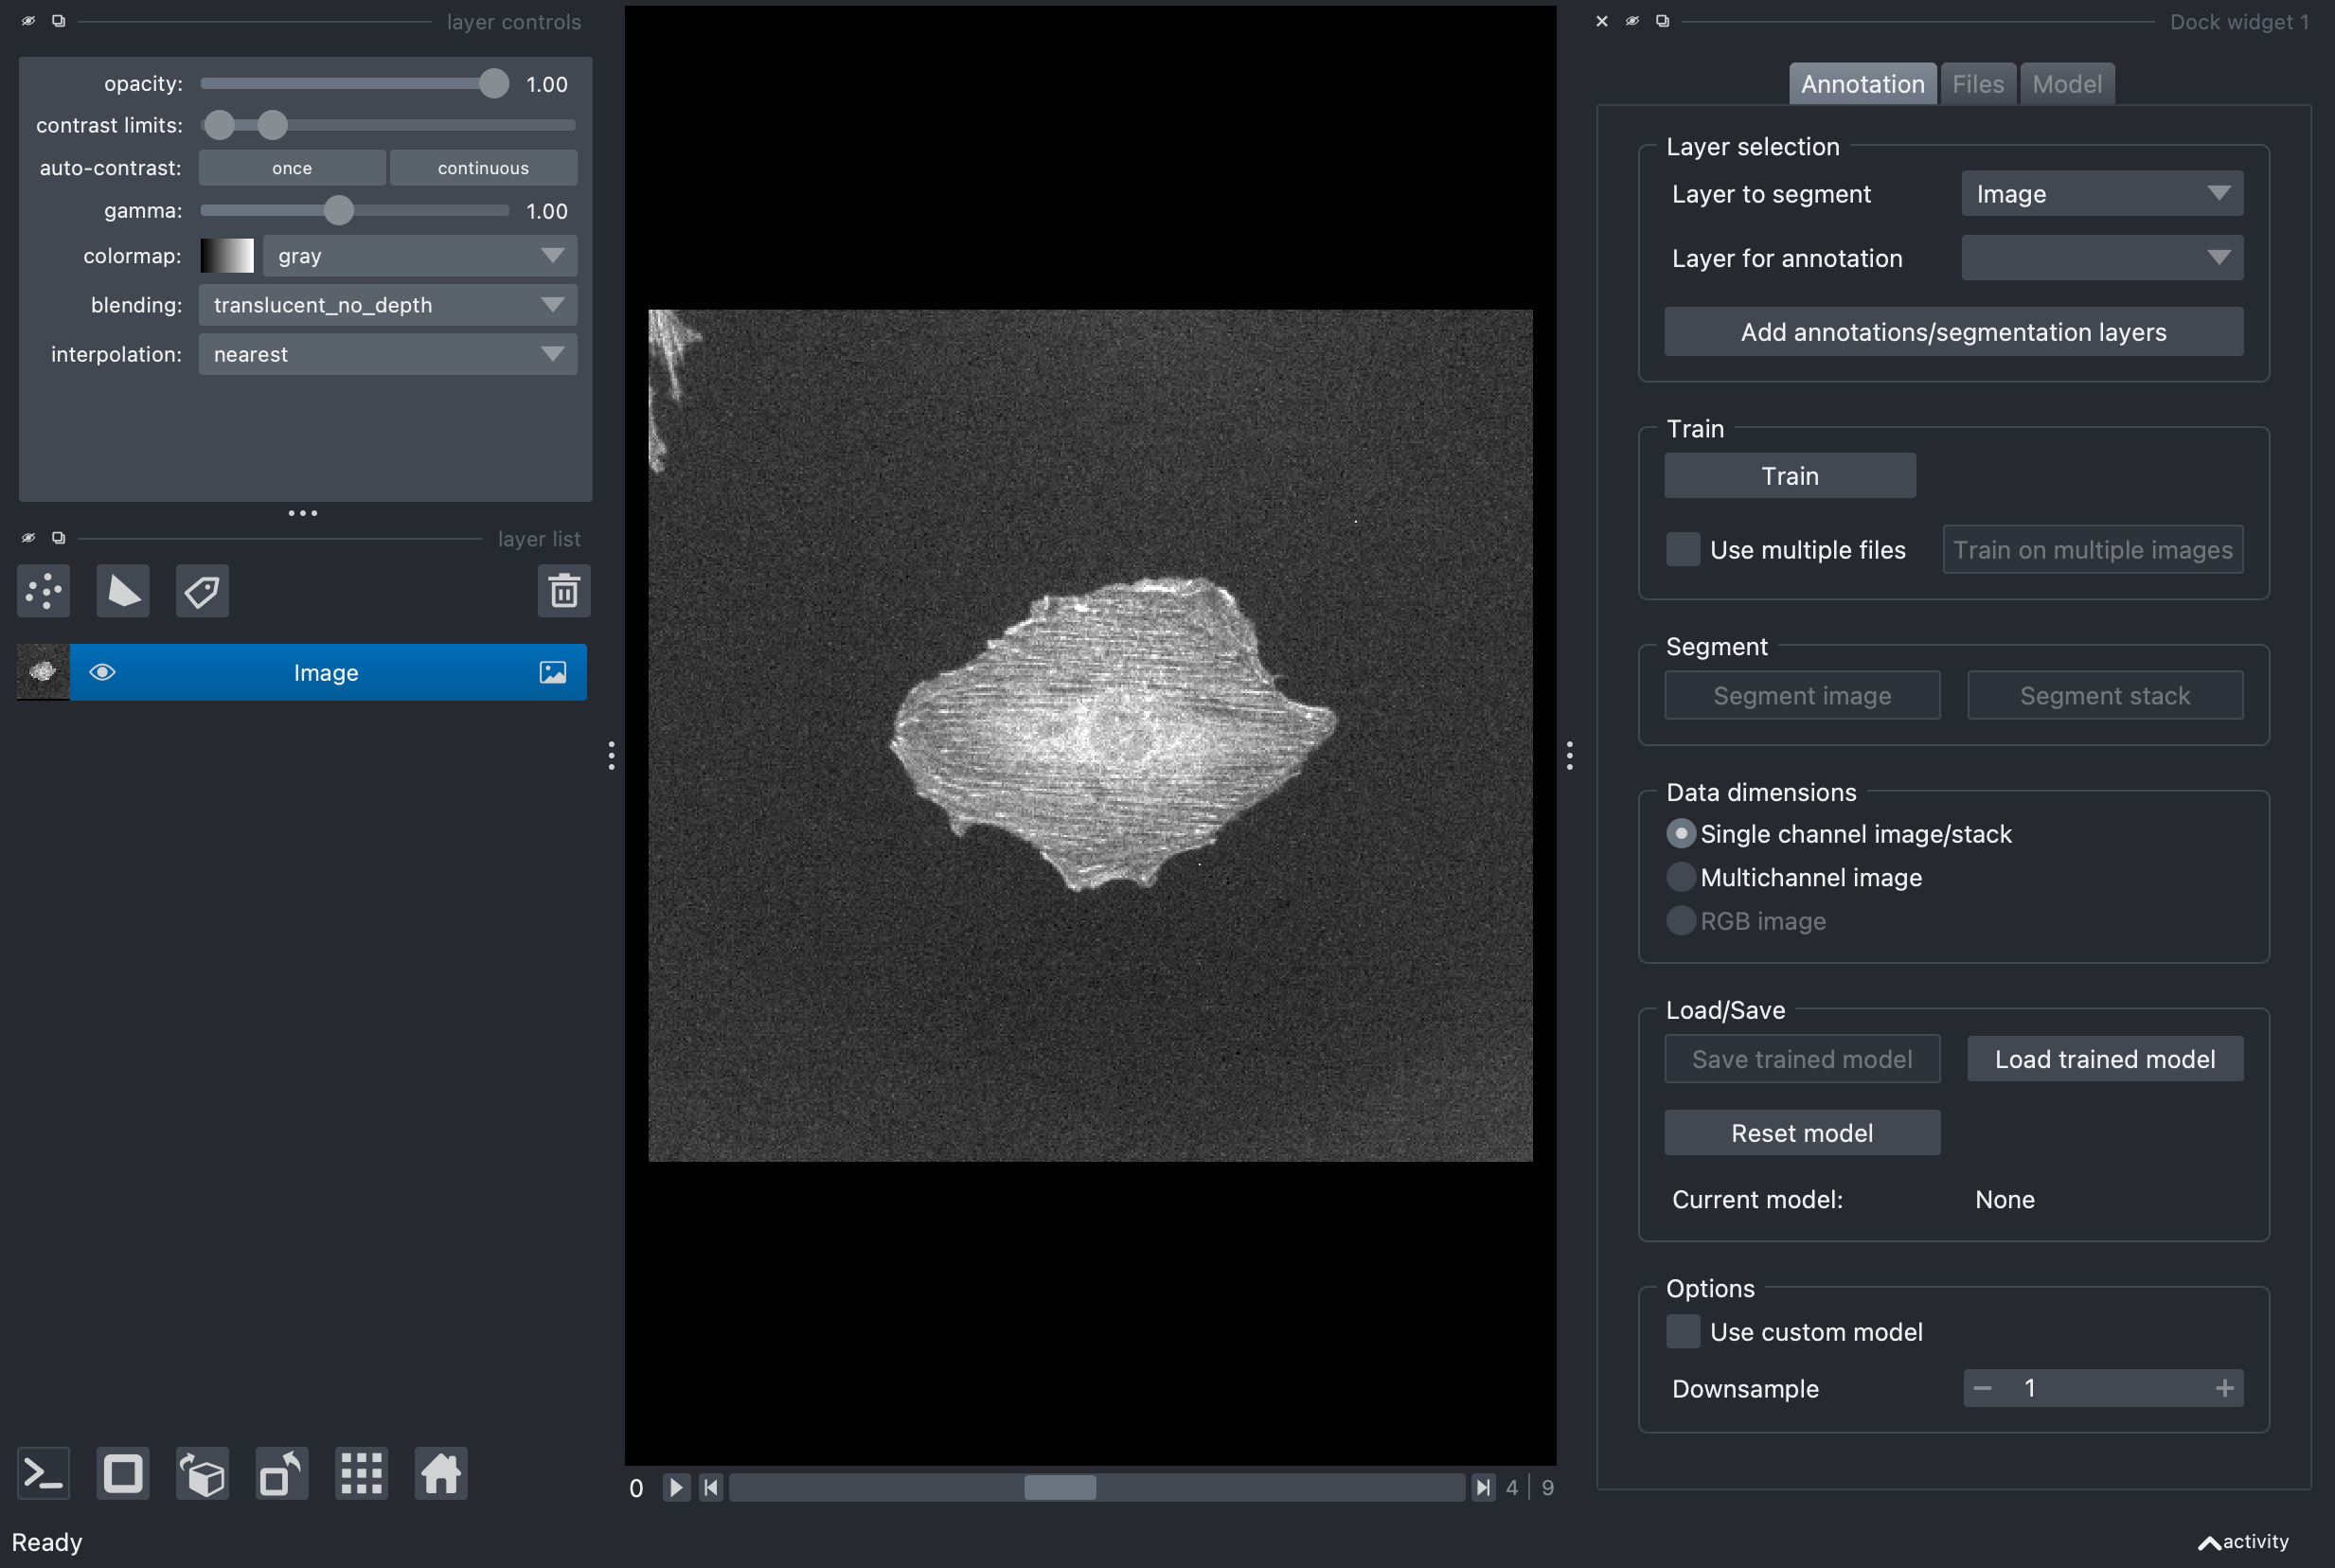

In [15]:
nbscreenshot(viewer)

When adding annotations layers through the button in the plugin, they will automatically have the same dimensions as the currently opened dataset (exception: multichannel images, see below).

Now we can annotate one or more frames in the stack:

In [16]:
self.add_annotation_layer()

In [17]:
#skimage.io.imsave('../../../Projects_data/napari-morphodynamics/Timelapse_labels.tiff',
#                 viewer.layers['annotations'].data, check_contrast=False)
labels = skimage.io.imread('../../../Projects_data/napari-morphodynamics/Timelapse_labels.tiff')
viewer.layers['annotations'].data = labels
viewer.layers['annotations'].refresh()

In [19]:
viewer.dims.current_step=(4,0,0)
im1 = viewer.screenshot(canvas_only=False)

In [20]:
viewer.dims.current_step=(9,0,0)
im2 = viewer.screenshot(canvas_only=False)

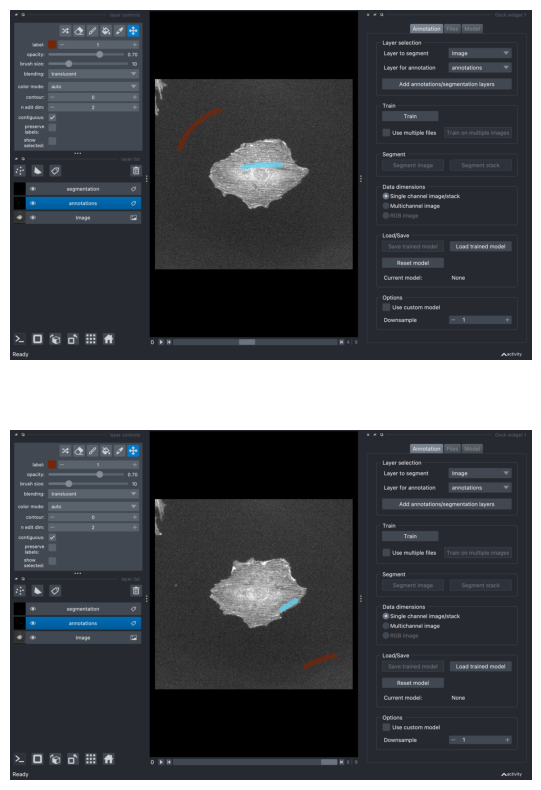

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].imshow(im1)
ax[1].imshow(im2)
ax[0].set_axis_off()
ax[1].set_axis_off()

If we now click on ```Train```, *all annotations from all annotated frames* will be taken into account.

Once training is done, we can verify the quality of the segmentation on a single frame (the one currently shown in the viewer) by pressing ```Segment image```.

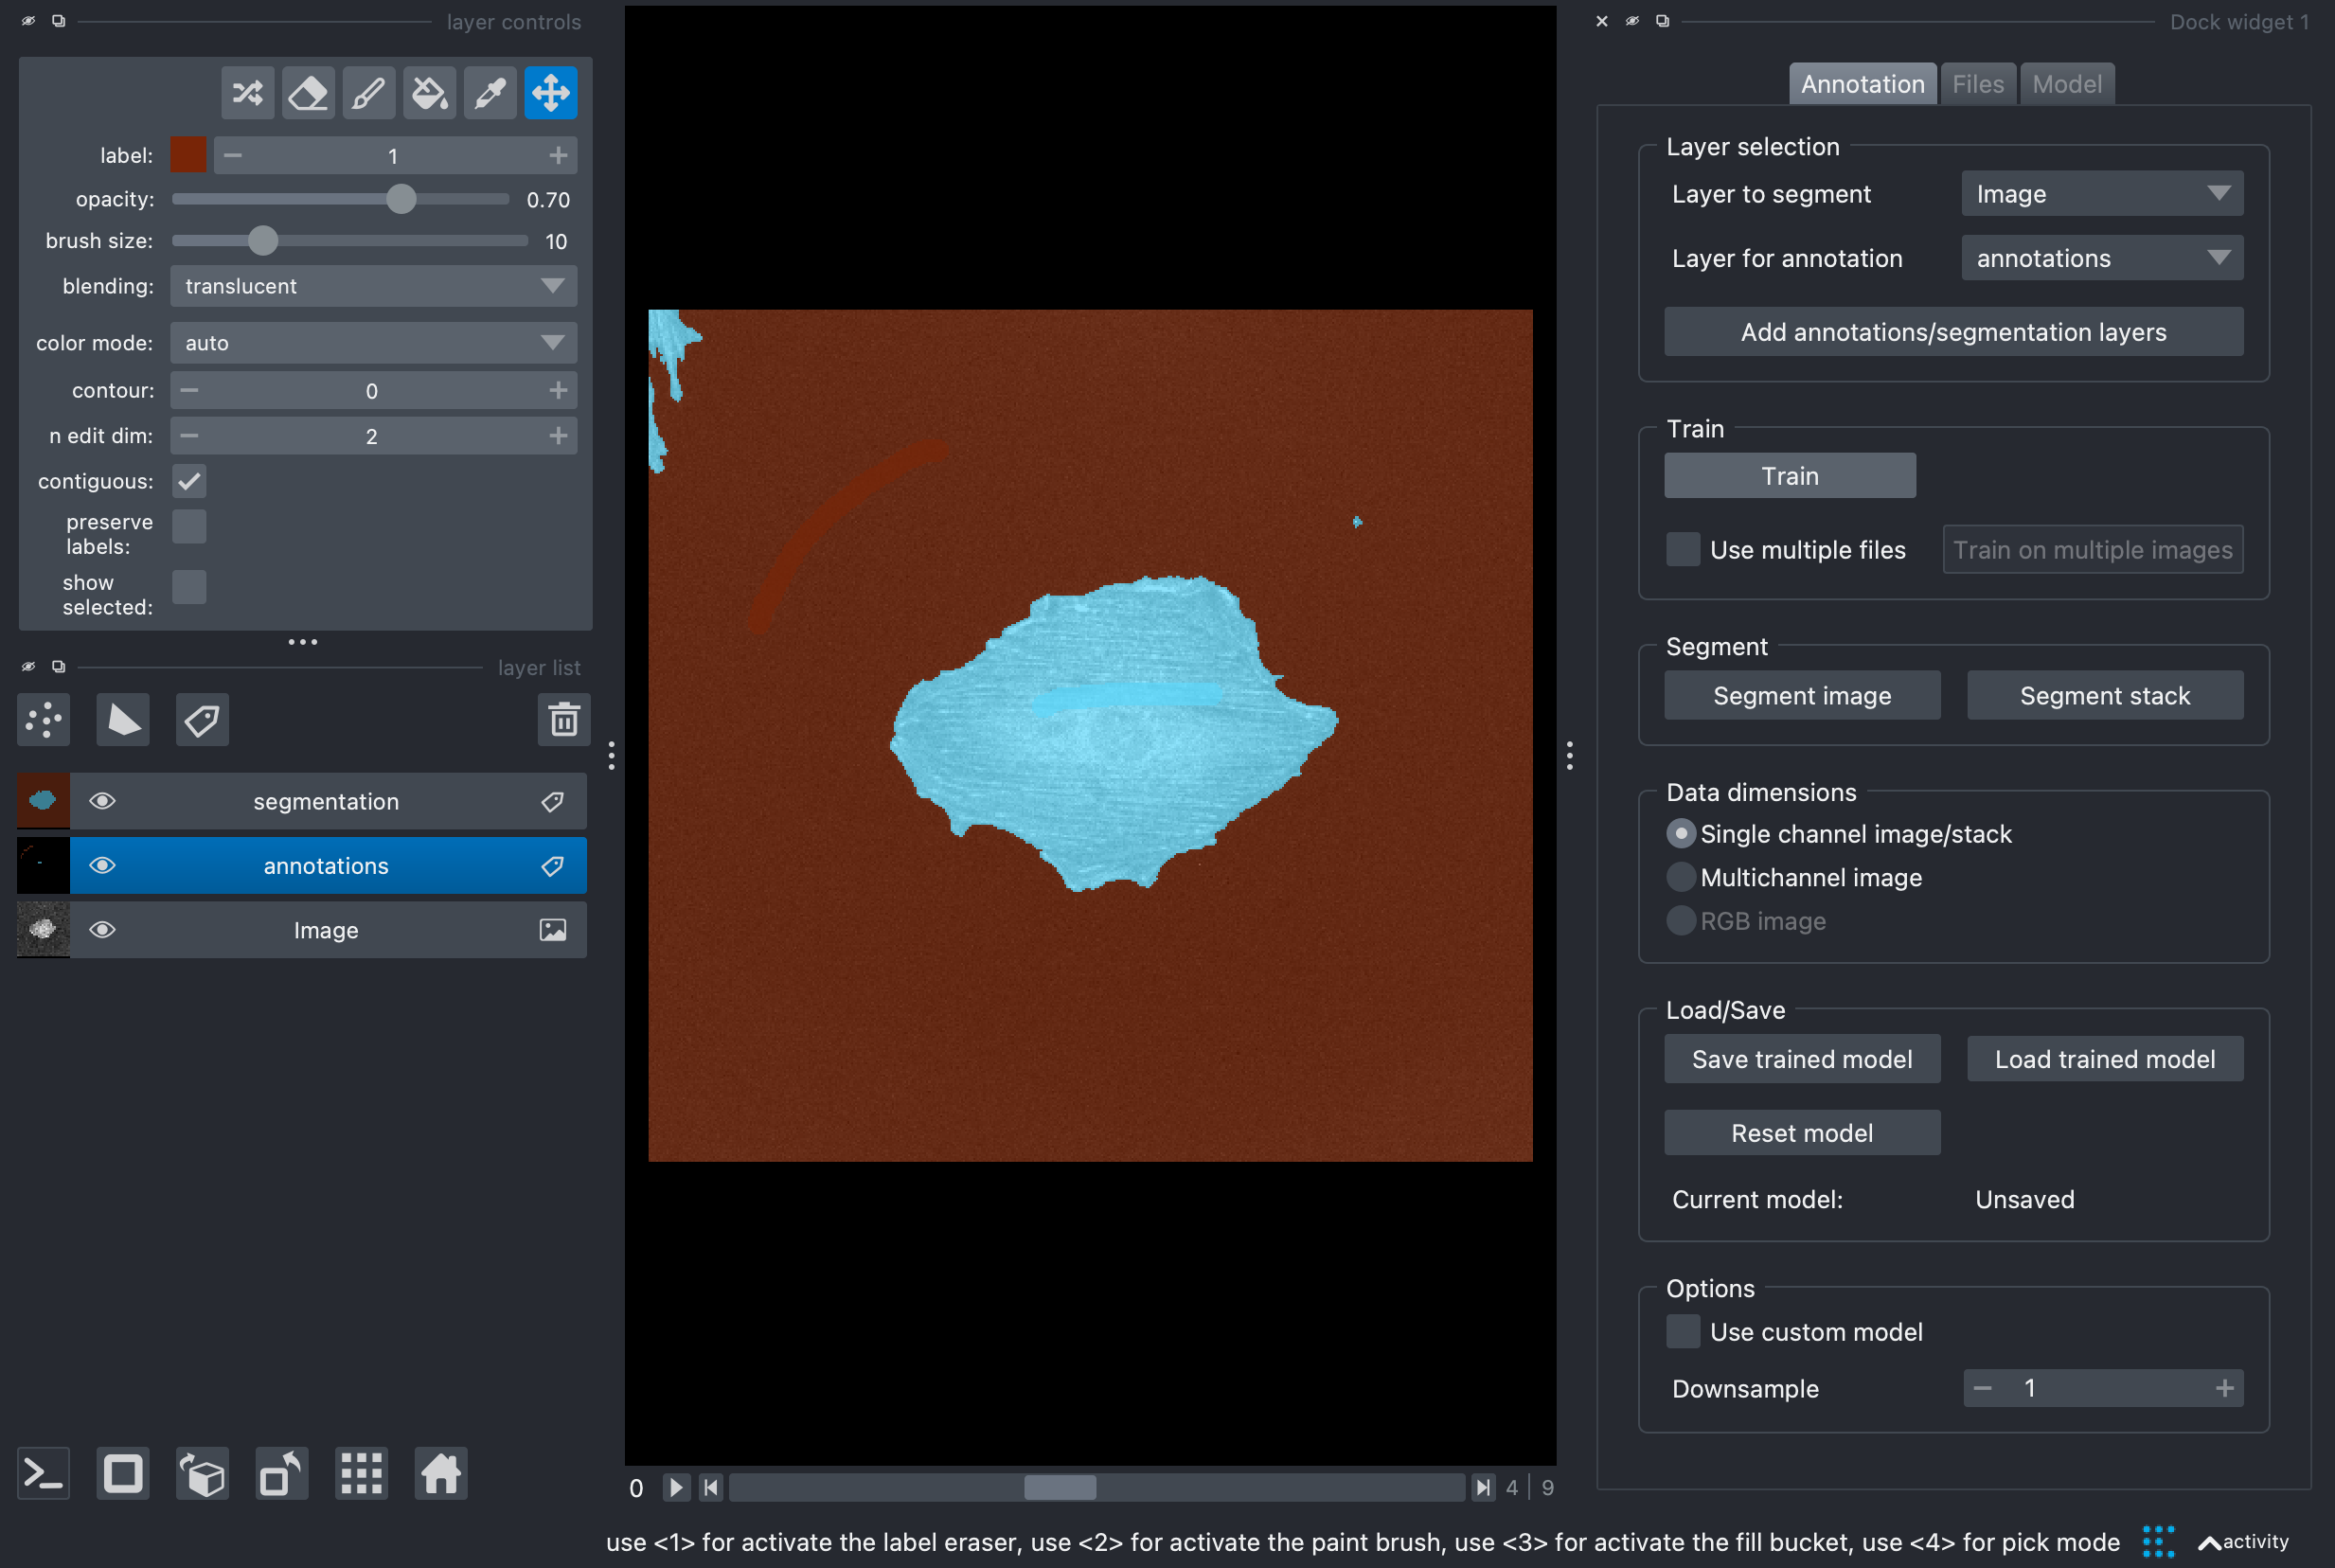

In [23]:
viewer.dims.current_step=(4,0,0)
self.update_classifier()
self.predict()
nbscreenshot(viewer)

If we are satisfied we can run ```Segment stack``` to get the full segmentation:

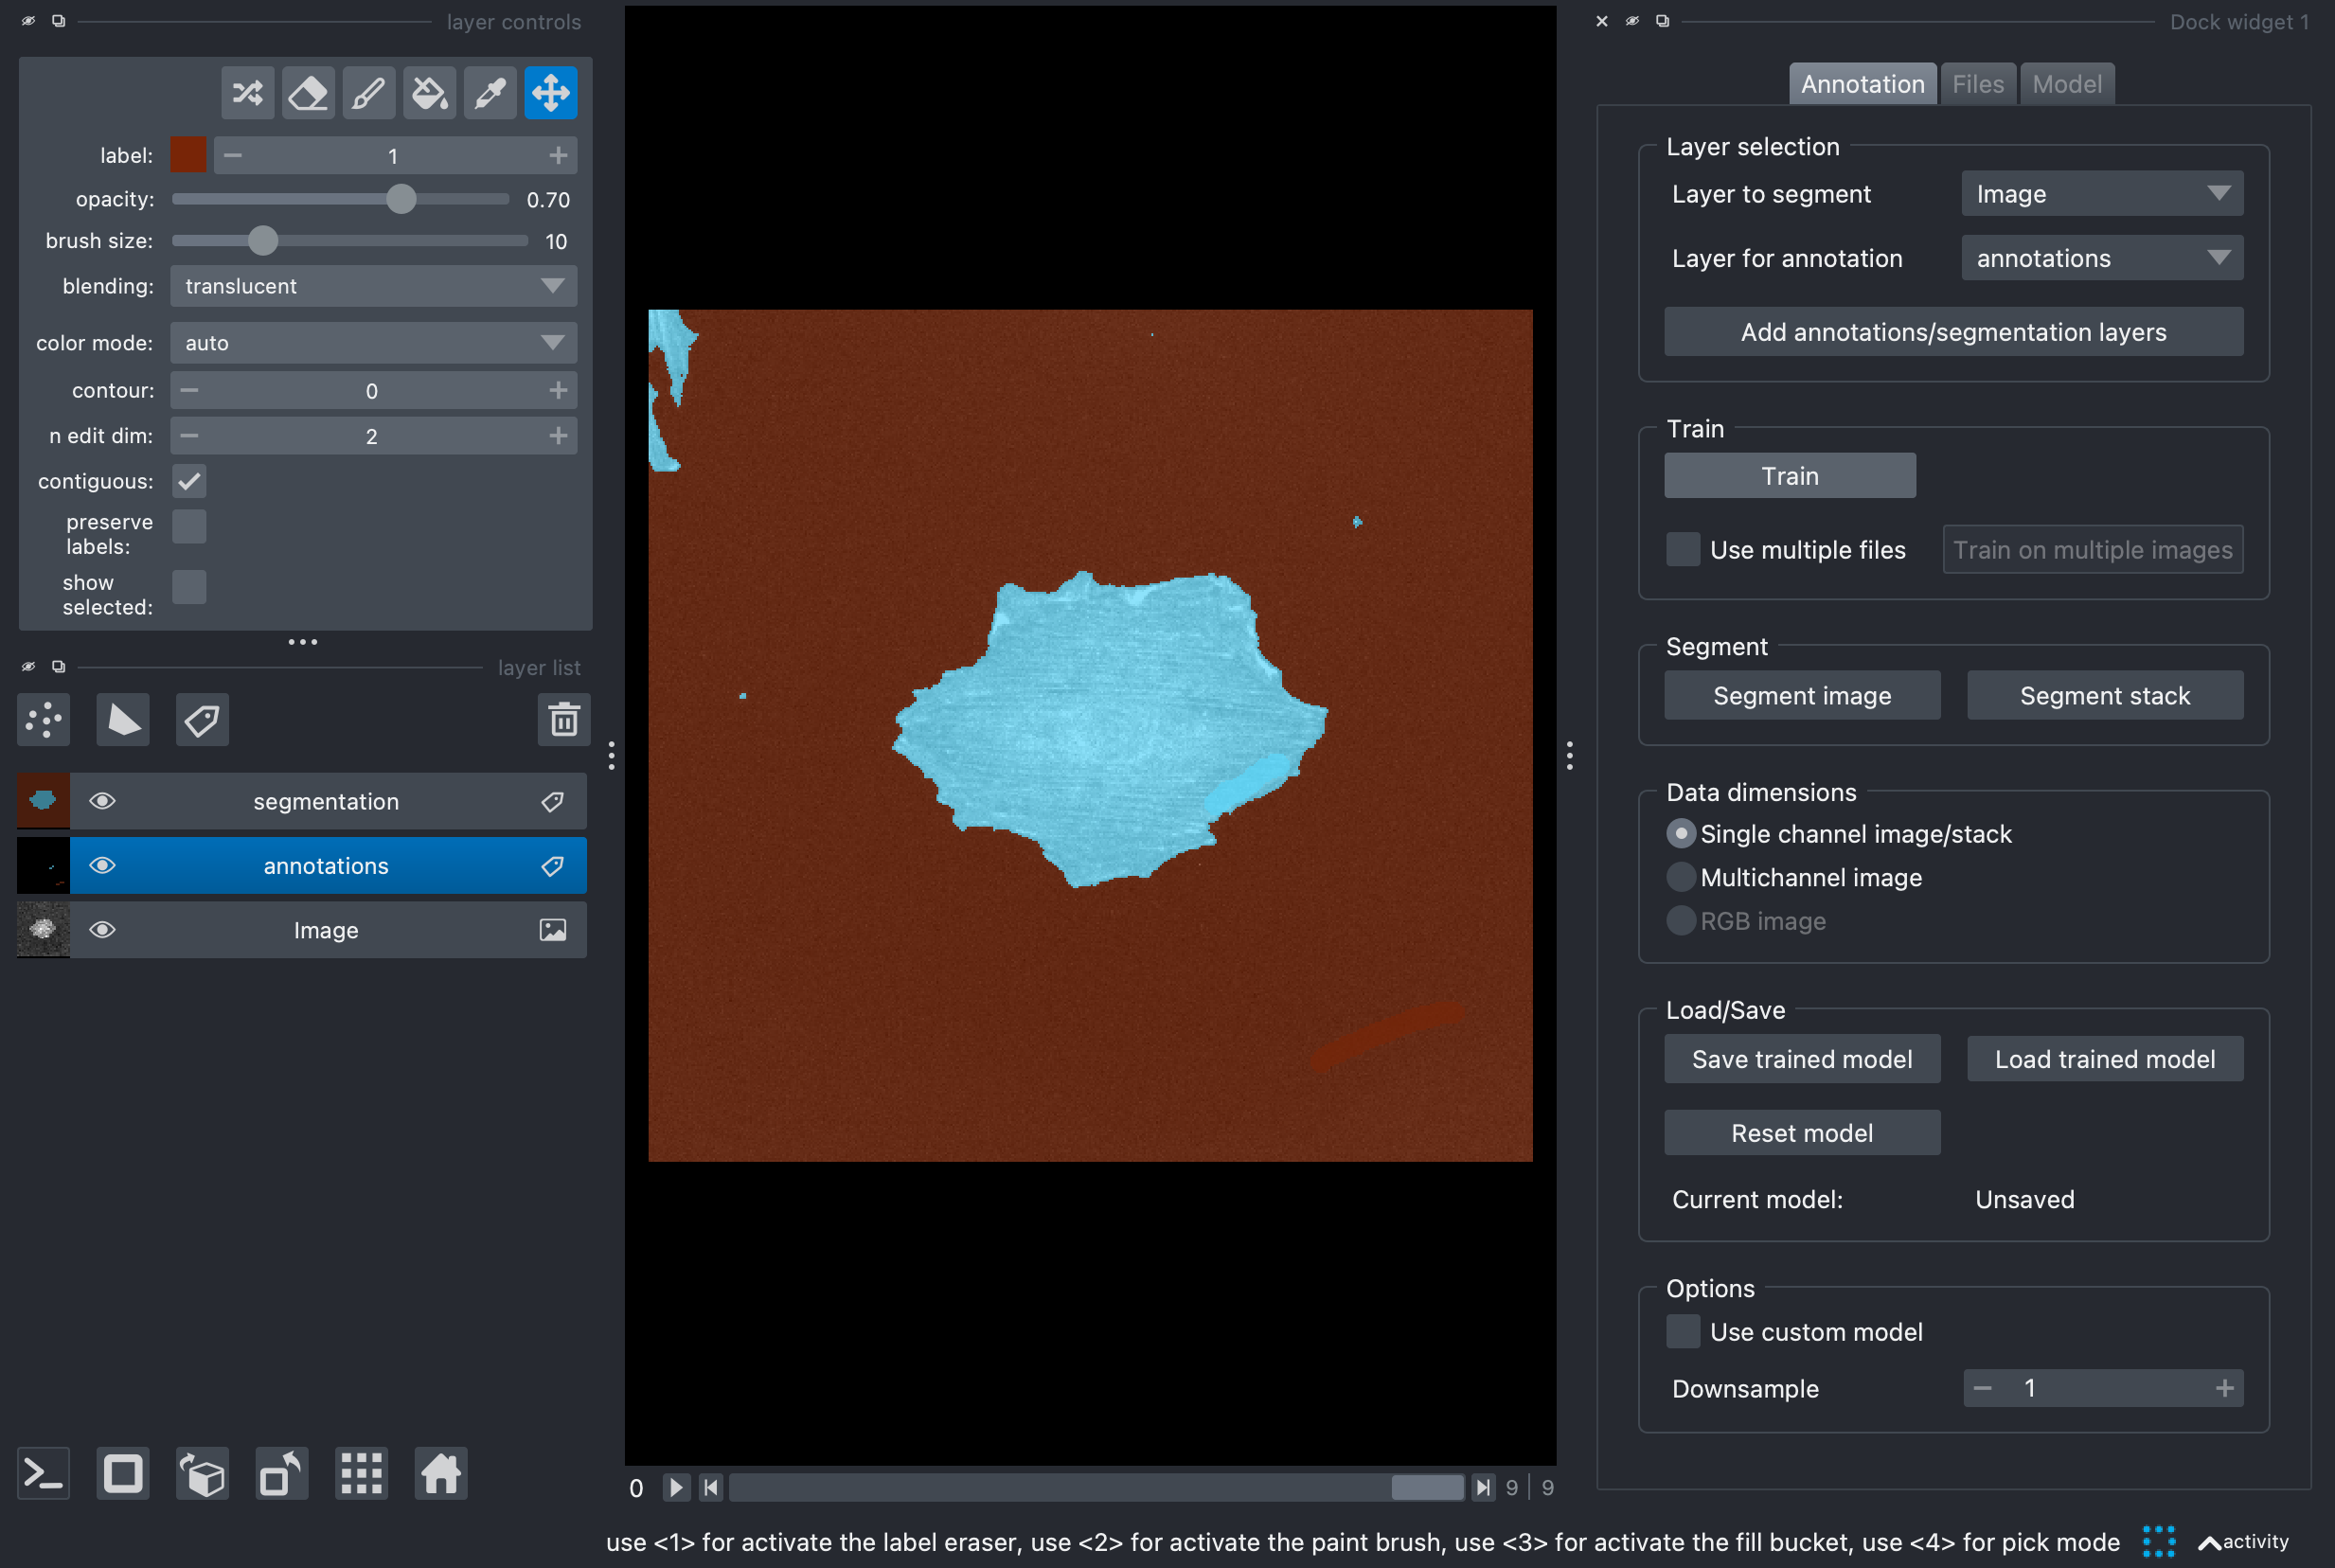

In [25]:
self.predict_all()
viewer.dims.current_step=(9,0,0)
nbscreenshot(viewer)

## Using multichannel images

Note that in certain cases, the additional dimension doesn't represent time or Z but channels. In such a case, annotations should be done only in a single plane and corresponding features be extracted and **combined from all channels**. This can be achieved by selecting the option ```Multichannel image``` in the ```Image type and normalization``` box.